# Looking at 'eli5' package explanation of classifier

#### Dependencies

In [109]:
import pandas as pd
import eli5
import matplotlib.pyplot as plit
%matplotlib inline
from eli5.sklearn import InvertableHashingVectorizer
import numpy as np

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.pipeline import Pipeline

import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 1

from datatasks.sample_data import sample_data

from models.models import evaluate_model

from models.plot import plot_confusion_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Load data

In [2]:
DATA_PATH = '../data/'
DATA_INTERIM_PATH = DATA_PATH + 'interim/'
train = pd.read_csv(DATA_INTERIM_PATH + 'train_p.csv')
val = pd.read_csv(DATA_INTERIM_PATH + 'val_p.csv')

#### Sample data

In [5]:
train_s = sample_data(train, 50000, 'train')
val_s = sample_data(val, 10000, 'val')

In [77]:
X_train = train_s['preprocessed_text']
y_train = train_s['hyperpartisan']
X_test = val_s['preprocessed_text']
y_test = val_s['hyperpartisan']

In [74]:
my_stop_words = text.ENGLISH_STOP_WORDS.union(["jan", 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec',
                                              'continue', 'reading', 'below', 'advertisement', 'opens', 'new', 'window',
                                              '2017', '2018', '2016', '2015'])

In [105]:
vec = HashingVectorizer(ngram_range=(1,2), stop_words=my_stop_words)
clf = SGDClassifier()

pipeline = Pipeline([
    ('vec', vec),
    ('clf', clf)
])

In [106]:
pipeline.fit(X_train, y_train)

/Users/jmill/anaconda3/envs/SemEval2019-4/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Pipeline(memory=None,
     steps=[('vec', HashingVectorizer(alternate_sign=True, analyzer='word', binary=False,
         decode_error='strict', dtype=<class 'numpy.float64'>,
         encoding='utf-8', input='content', lowercase=True,
         n_features=1048576, ngram_range=(1, 2), non_negative=False,
         norm='l2', pre...='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False))])

In [107]:
predicted = pipeline.predict(X_test)
evaluate_model(predicted, y_test)

             precision    recall  f1-score   support

      False       0.75      0.37      0.50      4999
       True       0.58      0.87      0.70      5000

avg / total       0.67      0.62      0.60      9999

Accuracy: 0.6241


0.624062406240624

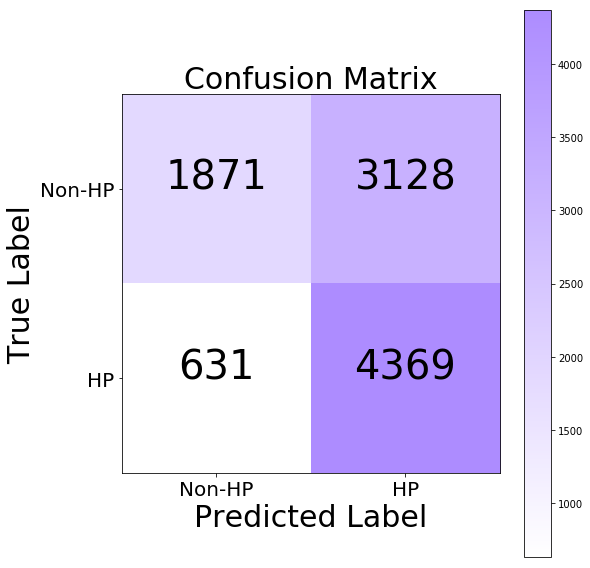

In [108]:
plot_confusion_matrix(y_test, predicted)

In [95]:
eli5.show_weights(clf, vec=vec, top=100)

Weight?,Feature
+6.869,source
+6.295,mr
+6.128,beast
+4.931,shares
+4.847,copyright
+4.809,click
+4.805,original
+4.702,editing
+4.677,marketwatch
+4.670,fool


In [120]:
obs = 679
eli5.show_prediction(clf, X_test[obs], vec=vec)

In [30]:
y_test.iloc[100]

False

In [32]:
val_s.iloc[50]

id                                                                389593
published-at                                                  2013-03-07
title                  Police Want Power to Take Weapons From Mentall...
article_text           Imagine you?re a cop. You show up to a scene w...
external_links                                                        {}
internal_links               {'/support-us/donors-and-members/': 'here'}
hyperpartisan                                                      False
bias                                                               least
url                    http://texastribune.org/2013/03/07/police-want...
labeled-by                                                     publisher
HP_links_count                                                         0
nonHP_links_count                                                      0
unknown_links_count                                                    0
domain                                             

In [44]:
val_s[val_s['preprocessed_text'].str.contains('continue')].index

Int64Index([   0,   11,   12,   17,   21,   25,   28,   31,   34,   41,
            ...
            9980, 9982, 9985, 9986, 9989, 9991, 9993, 9995, 9997, 9998],
           dtype='int64', length=2664)

In [55]:
val[val['nonHP_links_count']>10]['hyperpartisan'].value_counts()

False    7136
True     1694
Name: hyperpartisan, dtype: int64

In [62]:
val[val['domain']=='notallowedto']

,id,published-at,title,article_text,external_links,internal_links,hyperpartisan,bias,url,labeled-by,HP_links_count,nonHP_links_count,unknown_links_count,domain,preprocessed_text


In [80]:
X_train

0        brown bailout hardly \n last month fedex launc...
1        prosecutors exsurgeon calls himself killer in ...
2        japanese firm fined 677m in shipping conspirac...
3        sol hoping to make last home stand memorable \...
4        israeli police arrest tycoon suspected of brib...
5        19yearold grandfathers \n analysis opinions iz...
6        kemba gets 19 in hornets 10894 rout of slumpin...
7        ole miss rallies to beat mississippi state 645...
8        state budget blueprint moves forward \n \n \nt...
9        thursdays scores \n addison 73 manchester 70 \...
10       4 teams remain in us gas balloon race \n \nalb...
11       florida mom arrested after severely burned bab...
12       briefcarl icahn and darwin deason push for xer...
13       slogan news flash everythings not always about...
14       recruits fill specific roles for unm hoops \n ...
15       man charged after argument leads to shooting i...
16       doctor says he is found the g spot \n \n \nost.

In [110]:
ivec = InvertableHashingVectorizer(vec)
sample_size = len(X_train) // 10
X_sample = np.random.choice(X_train, size=sample_size)
ivec.fit(X_sample);

In [112]:
eli5.show_weights(clf, vec=ivec, top=100)

Weight?,Feature
+3.620,source …
+3.546,mr …
+2.495,editing …
+2.428,shares …
+2.346,copyright …
+2.287,beast
+2.276,daily beast
+2.244,watch
+2.203,click
+2.107,original …


In [119]:
train[train['preprocessed_text'].str.contains('says')]['domain'].value_counts()

abqjournal                22464
foxbusiness               21019
pri                       19446
apnews                    14815
motherjones               11762
counterpunch              11632
reuters                    7968
truthdig                   7732
newsline                   6581
thedailybeast              6329
poynter                    6241
dailywire                  4506
baptistnews                3236
chicagoreporter            2946
consortiumnews             2761
nbcnews                    2553
factcheck                  2483
washingtonblade            2415
eppc                       1433
thegoldwater               1385
calwatchdog                1264
inthesetimes               1260
21stcenturywire            1233
billmoyers                 1092
ivn                         980
natmonitor                  971
mintpressnews               939
therealnews                 918
circa                       771
dissentmagazine             690
                          ...  
american